## Has new updates to my Natural Language Bot lead to more Customer Retention and Satisfaction? 


### Context  

Natural Language Bots are becoming exponentially popular in enhancing customer experiences and improving business revenues, especially when _integrated on websites_ compared to traditional bots . <br>
However, quantitative studies are needed to understand the pain-points of customer interactions. <br>
Below chart from Grand View Research shows chatbot market projection in North America. <br>
The market is **expected to grow from ~1 billion dollar to ~25 billion dollars in a 10 year span from 2020 - 2030.** <br>


![](ex1.jpg)

### Business Questions
1. Identify ways of quantifying customer experience via personalized chat bot interaction. 
2. Is staying on top of technology integration with current platforms _actually_ increasing business revenues? 
3. What are the pain-points in this exchange for future customizations and updates in the bot - drop-off topics, customer retention rate etc?
4. Are new customizations leading to an expected positive impact (A/B testing)? 
5. Measure long-term impact on business ROI


### Tools and Techniques 
A/B testing, NLP, Sentiment Analysis, Transformers, Linear Discriminant Analysis (LDA), ChatGPT, NLTK, Python, Pandas, Matplotlib, 

### Data 
Real world use case would be a company's webpage with Natural Language Bot assisting in purchases. <br> 
This interaction decides if a customer ends up buying a product or not (conversion rate) <br>

We will be using ChatGPT-3.5 and ChatGPT-4 conversation data for demonstration puposes <br>
We have conversation exchanges with ChatGPT from users across the globe collected over a period of - 
1. 6 months (Nov'22 - Apr'23, hereafter called **A-data**) - 52,000 conversations 
2. 3 months (Apr'23 - Jun'23, hereafter called **B-data**) - 40,000 conversations

This data is retrieved from shareGPT platform in json format with 3 columns - 

1. 'id', - unique id of a conversation exchange
2. 'from' - 'human' or 'gpt'
3. 'value' - natural language text of the interaction 

This study goes one step further on recently published work on this dataset (10th Dec 2023) - [Early ChatGPT User Portrait through the Lens of Data](https://arxiv.org/pdf/2312.10078.pdf) <br>
Authors found GPT to be POSITIVE (>80%), NEUTRAL (8%) and NEGATIVE (12%) even when given with negative prompts, suggesting overall positive tone of this Natural Language Bot

### A/B testing (historic) 

* We perform sentiment analysis on **A-data** and **B-data** to get the % of conversations with high-confidence positive user-experience (sentiment) before and after the bot upgrade.
* We perform Power Analysis to get minimum number of samples required from both the datasets to have statistically significant results
* We find that there is 2.5 % increase (57.8 % to 60.2 %) in % of high-confidence positive sentiment conversations. 
* This is statistically significant and as expected !
* We also create WordCloud of high-confidence negative sentiment conversations and find that majority of the topics were related to programming, code, data and modeling. 

### NOTE - 

* In _real-time_ A/B testing, we would launch two different versions we want to test SIMULTANEOUSLY to account for external factors like seasonality.
* For the sake of the study, we will assume that for A-data and B-data only thing that changes is the new upgrade to the bot (3.5 --> 4) 
* The shareGPT dataset might not be representative of the entire userbase
* For e-commerce scenario, additional information like how long a session lasted AND how many users who visited the website ended up chatting with the bot and end up with certain _purchase_, we could quantify the quality of user engagement and its impact on revenue generation. 

**Users visiting website (100%) > Users interacting with chatbot (40%)  > Users performing desirable action (generating revenue) (10%)**


In [1]:
# Importing necessary libraries 

import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import markdown
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.api as sms
import matplotlib as mpl
from math import ceil


## Starting with A-data

In [3]:
# Load the JSON data in pandas dataframe

data = pd.read_json('/Users/yashakaushal/Documents/Projects/ab_testing/sg_52k.json')
data

,id,conversations
0,Og9h3C1,"[{'from': 'human', 'value': 'root@openvpn:/hom..."
1,zi8VbDz,"[{'from': 'human', 'value': '提供一個媒體招待會的流程表，內容是..."
2,i6IyJda,"[{'from': 'human', 'value': 'How to tell if a ..."
3,A5AbcES,"[{'from': 'human', 'value': 'In Java, I want t..."
4,KXxu9my,"[{'from': 'human', 'value': 'The following is ..."
...,...,...
52175,jhqx19T,"[{'from': 'human', 'value': 'I am installing c..."
52176,ndbWw7c,"[{'from': 'human', 'value': 'How to implement ..."
52177,D6jDzdX,"[{'from': 'human', 'value': 'curl -H ""Content-..."
52178,jsxN4Dv,"[{'from': 'human', 'value': '我需要你幫我填寫英文履歷，我給你中..."


In [5]:
# Explode the 'conversations' column into separate rows

data_exploded = data.explode('conversations')
data_exploded

,id,conversations
0,Og9h3C1,"{'from': 'human', 'value': 'root@openvpn:/home..."
0,Og9h3C1,"{'from': 'gpt', 'value': '<div class=""markdown..."
0,Og9h3C1,"{'from': 'human', 'value': 'sorry kan je een g..."
0,Og9h3C1,"{'from': 'gpt', 'value': '<div class=""markdown..."
0,Og9h3C1,"{'from': 'human', 'value': 'kan je uitleg geve..."
...,...,...
52179,clFMzGf,"{'from': 'gpt', 'value': '<div class=""request-..."
52179,clFMzGf,"{'from': 'human', 'value': 'OK. Let's forget a..."
52179,clFMzGf,"{'from': 'gpt', 'value': '<div class=""request-..."
52179,clFMzGf,"{'from': 'human', 'value': 'why you chose Amaz..."


In [9]:
# Convert the dictionaries in 'conversations' into separate columns

data_exploded = pd.concat([data_exploded.drop(['conversations'], axis=1), 
                           data_exploded['conversations'].apply(pd.Series)], axis=1)

data_exploded.drop(columns=['text','markdown'],inplace=True)
data_exploded

,id,from,value
0,Og9h3C1,human,root@openvpn:/home/openvpn# ./openvpn-install....
0,Og9h3C1,gpt,"<div class=""markdown prose w-full break-words ..."
0,Og9h3C1,human,sorry kan je een gebruikershandleiding maken?
0,Og9h3C1,gpt,"<div class=""markdown prose w-full break-words ..."
0,Og9h3C1,human,kan je uitleg geven waarom je als je passwordl...
...,...,...,...
52179,clFMzGf,gpt,"<div class=""request-:R3d6:-27 markdown prose b..."
52179,clFMzGf,human,OK. Let's forget about Azure Cloud. Let's say ...
52179,clFMzGf,gpt,"<div class=""request-:R3d6:-29 markdown prose b..."
52179,clFMzGf,human,why you chose Amazon EventBridge ?


In [10]:
# Function to extract text from HTML

def extract_text_from_html(html_content):
    if pd.notna(html_content):
        soup = BeautifulSoup(html_content, 'html.parser')
        return soup.get_text()
    return None

# Apply the function to extract text

data_exploded['extracted_text'] = data_exploded['value'].apply(extract_text_from_html)
data_exploded

/Users/yashakaushal/opt/anaconda3/lib/python3.7/site-packages/bs4/__init__.py:439: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  MarkupResemblesLocatorWarning
/Users/yashakaushal/opt/anaconda3/lib/python3.7/site-packages/bs4/__init__.py:408: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
/Users/yashakaushal/opt/anaconda3/lib/python3.7/site-packages/bs4/builder/__init__.py:546: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lx

,id,from,value,extracted_text
0,Og9h3C1,human,root@openvpn:/home/openvpn# ./openvpn-install....,root@openvpn:/home/openvpn# ./openvpn-install....
0,Og9h3C1,gpt,"<div class=""markdown prose w-full break-words ...",Op basis van de gegevens in de prompt log kan ...
0,Og9h3C1,human,sorry kan je een gebruikershandleiding maken?,sorry kan je een gebruikershandleiding maken?
0,Og9h3C1,gpt,"<div class=""markdown prose w-full break-words ...",Open een terminal op de OpenVPN server en navi...
0,Og9h3C1,human,kan je uitleg geven waarom je als je passwordl...,kan je uitleg geven waarom je als je passwordl...
...,...,...,...,...
52179,clFMzGf,gpt,"<div class=""request-:R3d6:-27 markdown prose b...",Azure SignalR Service is a managed service tha...
52179,clFMzGf,human,OK. Let's forget about Azure Cloud. Let's say ...,OK. Let's forget about Azure Cloud. Let's say ...
52179,clFMzGf,gpt,"<div class=""request-:R3d6:-29 markdown prose b...","Sure, here is an updated architecture for a so..."
52179,clFMzGf,human,why you chose Amazon EventBridge ?,why you chose Amazon EventBridge ?


In [ ]:
# def markdown_to_text(markdown_string):
#     """ Converts a markdown string to plaintext """
#     # md -> html -> text since BeautifulSoup can extract text from html
#     html = markdown.markdown(markdown_string)
#     soup = BeautifulSoup(html, "html.parser")
#     # Extract text
#     text = ''.join(soup.findAll(text=True))
#     return text

# data_exploded['text_from_markdown'] = data_exploded['value'].apply(markdown_to_text)
# data_exploded

In [13]:
# Preprocessing steps to get languages from the text 

from langdetect import detect, DetectorFactory, LangDetectException

# Function to detect language
def detect_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return "unknown"

# Apply the function to your DataFrame and drop rows with NaN values

data_exploded['language'] = data_exploded['extracted_text'].apply(detect_language)
data_exploded = data_exploded.dropna()
data_exploded

/Users/yashakaushal/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (1,2,3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,from,value,extracted_text,language
0,Og9h3C1,human,root@openvpn:/home/openvpn# ./openvpn-install....,root@openvpn:/home/openvpn# ./openvpn-install....,en
1,Og9h3C1,gpt,"<div class=""markdown prose w-full break-words ...",Op basis van de gegevens in de prompt log kan ...,nl
2,Og9h3C1,human,sorry kan je een gebruikershandleiding maken?,sorry kan je een gebruikershandleiding maken?,af
3,Og9h3C1,gpt,"<div class=""markdown prose w-full break-words ...",Open een terminal op de OpenVPN server en navi...,nl
4,Og9h3C1,human,kan je uitleg geven waarom je als je passwordl...,kan je uitleg geven waarom je als je passwordl...,en
...,...,...,...,...,...
1499571,clFMzGf,gpt,"<div class=""request-:R3d6:-27 markdown prose b...",Azure SignalR Service is a managed service tha...,en
1499572,clFMzGf,human,OK. Let's forget about Azure Cloud. Let's say ...,OK. Let's forget about Azure Cloud. Let's say ...,en
1499573,clFMzGf,gpt,"<div class=""request-:R3d6:-29 markdown prose b...","Sure, here is an updated architecture for a so...",en
1499574,clFMzGf,human,why you chose Amazon EventBridge ?,why you chose Amazon EventBridge ?,en


In [ ]:
# data_exploded = pd.read_csv('/Users/yashakaushal/Documents/Projects/ab_testing/data_exploded_language.csv')
# data_exploded = data_exploded.drop(columns=['text_from_markdown'])

# data_exploded.to_csv('/Users/yashakaushal/Documents/Projects/ab_testing/data_exploded.csv', index=False)
# data_exploded.to_csv('/Users/yashakaushal/Documents/Projects/ab_testing/data_exploded_language.csv', index=False)
# data_exploded.drop(columns=['text','markdown'],inplace=True)

In [14]:
# Checking values in column 'from'

data_exploded['from'].unique()

array(['human', 'gpt', 'system', 'chatgpt', 'user', 'bing', 'assistant'],
      dtype=object)

In [15]:
# after manual inspection, removing the system generated artifacts such that column 'from' contains either 'human' or 'gpt'

from_map = {'chatgpt':'gpt','user':'human','assistant':'gpt'}
data_exploded['from'] = data_exploded['from'].replace(from_map)
data_exploded = data_exploded[(data_exploded['from']=='gpt') | (data_exploded['from']=='human')]
data_exploded

,id,from,value,extracted_text,language
0,Og9h3C1,human,root@openvpn:/home/openvpn# ./openvpn-install....,root@openvpn:/home/openvpn# ./openvpn-install....,en
1,Og9h3C1,gpt,"<div class=""markdown prose w-full break-words ...",Op basis van de gegevens in de prompt log kan ...,nl
2,Og9h3C1,human,sorry kan je een gebruikershandleiding maken?,sorry kan je een gebruikershandleiding maken?,af
3,Og9h3C1,gpt,"<div class=""markdown prose w-full break-words ...",Open een terminal op de OpenVPN server en navi...,nl
4,Og9h3C1,human,kan je uitleg geven waarom je als je passwordl...,kan je uitleg geven waarom je als je passwordl...,en
...,...,...,...,...,...
1499571,clFMzGf,gpt,"<div class=""request-:R3d6:-27 markdown prose b...",Azure SignalR Service is a managed service tha...,en
1499572,clFMzGf,human,OK. Let's forget about Azure Cloud. Let's say ...,OK. Let's forget about Azure Cloud. Let's say ...,en
1499573,clFMzGf,gpt,"<div class=""request-:R3d6:-29 markdown prose b...","Sure, here is an updated architecture for a so...",en
1499574,clFMzGf,human,why you chose Amazon EventBridge ?,why you chose Amazon EventBridge ?,en


In [17]:
# Checking all unique languages 

data_exploded.language.unique()

array(['en', 'nl', 'af', 'no', 'so', 'ko', 'zh-tw', 'es', 'it', 'ja',
       'fr', 'pt', 'zh-cn', 'vi', 'ca', 'tl', 'ro', 'unknown', 'et', 'sw',
       'id', 'sq', 'hr', 'de', 'fi', 'cs', 'cy', 'da', 'pl', 'sl', 'sv',
       'sk', 'he', 'tr', 'ru', 'bg', 'lv', 'hu', 'ar', 'lt', 'el', 'uk',
       'fa', 'th', 'mk', 'hi', 'te', 'gu', 'ur', 'pa', 'bn', 'ta', 'ml',
       'mr'], dtype=object)

In [18]:
# Creating a language map to replace values in column 'language' 

language_map = {
    'en': 'English', 'nl': 'Dutch', 'af': 'Afrikaans', 'no': 'Norwegian', 
    'so': 'Somali', 'ko': 'Korean', 'zh-tw': 'Chinese (Traditional, Taiwan)', 
    'es': 'Spanish', 'it': 'Italian', 'ja': 'Japanese', 'fr': 'French', 
    'pt': 'Portuguese', 'zh-cn': 'Chinese (Simplified, China)', 'vi': 'Vietnamese', 
    'ca': 'Catalan', 'tl': 'Tagalog (Filipino)', 'ro': 'Romanian', 'unknown': 'Unknown', 
    'et': 'Estonian', 'sw': 'Swahili', 'id': 'Indonesian', 'sq': 'Albanian', 
    'hr': 'Croatian', 'de': 'German', 'fi': 'Finnish', 'cs': 'Czech', 
    'cy': 'Welsh', 'da': 'Danish', 'pl': 'Polish', 'sl': 'Slovenian', 
    'sv': 'Swedish', 'sk': 'Slovak', 'he': 'Hebrew', 'tr': 'Turkish', 
    'ru': 'Russian', 'bg': 'Bulgarian', 'lv': 'Latvian', 'hu': 'Hungarian', 
    'ar': 'Arabic', 'lt': 'Lithuanian', 'el': 'Greek', 'uk': 'Ukrainian', 
    'fa': 'Persian', 'th': 'Thai', 'mk': 'Macedonian', 'hi': 'Hindi', 
    'te': 'Telugu', 'gu': 'Gujarati', 'ur': 'Urdu', 'pa': 'Punjabi', 
    'bn': 'Bengali', 'ta': 'Tamil', 'ml': 'Malayalam', 'mr': 'Marathi'
}

In [19]:
data_exploded['language'] = data_exploded['language'].replace(language_map)
data_exploded

/Users/yashakaushal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,from,value,extracted_text,language
0,Og9h3C1,human,root@openvpn:/home/openvpn# ./openvpn-install....,root@openvpn:/home/openvpn# ./openvpn-install....,English
1,Og9h3C1,gpt,"<div class=""markdown prose w-full break-words ...",Op basis van de gegevens in de prompt log kan ...,Dutch
2,Og9h3C1,human,sorry kan je een gebruikershandleiding maken?,sorry kan je een gebruikershandleiding maken?,Afrikaans
3,Og9h3C1,gpt,"<div class=""markdown prose w-full break-words ...",Open een terminal op de OpenVPN server en navi...,Dutch
4,Og9h3C1,human,kan je uitleg geven waarom je als je passwordl...,kan je uitleg geven waarom je als je passwordl...,English
...,...,...,...,...,...
1499571,clFMzGf,gpt,"<div class=""request-:R3d6:-27 markdown prose b...",Azure SignalR Service is a managed service tha...,English
1499572,clFMzGf,human,OK. Let's forget about Azure Cloud. Let's say ...,OK. Let's forget about Azure Cloud. Let's say ...,English
1499573,clFMzGf,gpt,"<div class=""request-:R3d6:-29 markdown prose b...","Sure, here is an updated architecture for a so...",English
1499574,clFMzGf,human,why you chose Amazon EventBridge ?,why you chose Amazon EventBridge ?,English


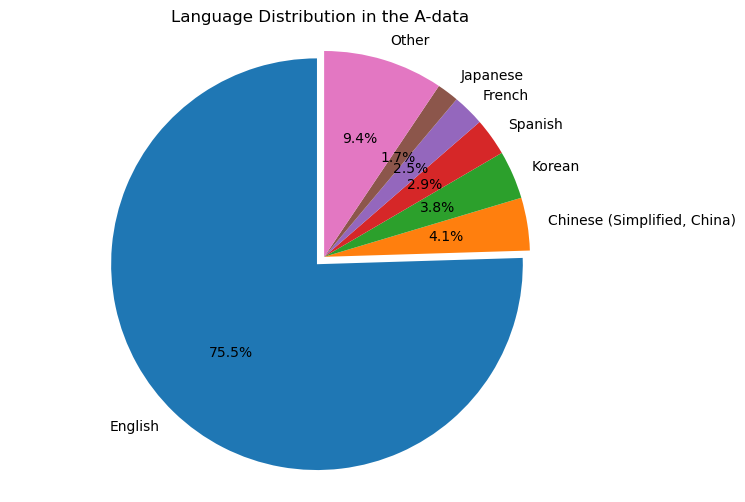

In [22]:
# Making pie chart to see language distribution of conversations in our data

language_counts = data_exploded['language'].value_counts()

# Define the threshold for minor languages, e.g., languages that occur less than 2% of the total
threshold = 0.015 * len(data_exploded)

# Separate major and minor languages
major_languages = language_counts[language_counts > threshold]
minor_languages = language_counts[language_counts <= threshold]

# Sum the counts of minor languages and create 'Other' category
other_count = minor_languages.sum()

# Combine major languages with 'Other'
language_counts_adjusted = major_languages.append(pd.Series(other_count, index=['Other']))

explode = [0.05 if language == 'English' else 0 for language in language_counts_adjusted.index]

# Now plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(language_counts_adjusted, labels=language_counts_adjusted.index, autopct='%1.1f%%', startangle=90,explode=explode)
plt.title('Language Distribution in the A-data')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


## Customer Satisfaction, Engagement and Retention 

A proxy for customer engagememt would be the length of conversation (here, number of prompt exchanges b/w human and gpt) <br>
A good engagement would be longer **length of conversation WITH positive sentiments** <br>
We will need to dig deepr to confirm this. <br>
We also want to make sure if new updates to our bot is performing better --> giving higher % of customers with positive sentiment score in the full conversation exchange <br>
A/B test will help us confirm that.

In [23]:
# Defining new column 'conv_length' that has count of prompt exchanges for each conversation ID 

data_exploded['conv_length'] = data_exploded.groupby('id')['id'].transform('count')

# Storing that in a list 'conv_length'

conv_length = data_exploded.groupby('id')['conv_length'].first().tolist() # unique value for each conversation 

data_exploded

/Users/yashakaushal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id,from,value,extracted_text,language,conv_length
0,Og9h3C1,human,root@openvpn:/home/openvpn# ./openvpn-install....,root@openvpn:/home/openvpn# ./openvpn-install....,English,38
1,Og9h3C1,gpt,"<div class=""markdown prose w-full break-words ...",Op basis van de gegevens in de prompt log kan ...,Dutch,38
2,Og9h3C1,human,sorry kan je een gebruikershandleiding maken?,sorry kan je een gebruikershandleiding maken?,Afrikaans,38
3,Og9h3C1,gpt,"<div class=""markdown prose w-full break-words ...",Open een terminal op de OpenVPN server en navi...,Dutch,38
4,Og9h3C1,human,kan je uitleg geven waarom je als je passwordl...,kan je uitleg geven waarom je als je passwordl...,English,38
...,...,...,...,...,...,...
1499571,clFMzGf,gpt,"<div class=""request-:R3d6:-27 markdown prose b...",Azure SignalR Service is a managed service tha...,English,56
1499572,clFMzGf,human,OK. Let's forget about Azure Cloud. Let's say ...,OK. Let's forget about Azure Cloud. Let's say ...,English,56
1499573,clFMzGf,gpt,"<div class=""request-:R3d6:-29 markdown prose b...","Sure, here is an updated architecture for a so...",English,56
1499574,clFMzGf,human,why you chose Amazon EventBridge ?,why you chose Amazon EventBridge ?,English,56


In [24]:
# Checking the statistics of conversation lengths - 

data = np.array(conv_length)

stats = {
    "mean": np.mean(data),
    "median": np.median(data),
    "standard deviation": np.std(data),
    "variance": np.var(data),
    "minimum": np.min(data),
    "maximum": np.max(data),
    "sum": np.sum(data)
}
print(stats)

{'mean': 15.773644569654458, 'median': 6.0, 'standard deviation': 34.142759733792005, 'variance': 1165.7280422394485, 'minimum': 1, 'maximum': 998, 'sum': 823053}


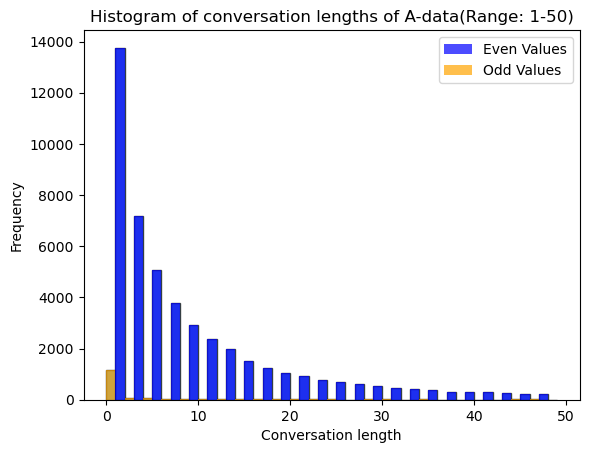

In [42]:
# Plotting a histogram of it

data = np.array(conv_length)

bins = np.arange(0.5, 50.5, 1) # trimming the conv lengths are > 50 as there are very few of them

# Pre-calculate histogram data for odd and even values
hist_all, _ = np.histogram(data, bins=bins)
hist_odd, _ = np.histogram(data[data % 2 == 1], bins=bins)
hist_even, _ = np.histogram(data[data % 2 == 0], bins=bins)

# Plotting
plt.bar(bins[:-1], hist_all, width=1, edgecolor='black', alpha=0.7)
plt.bar(bins[:-1], hist_even, width=1, color='blue', alpha=0.7, label='Even Values', bottom=hist_odd)
plt.bar(bins[:-1], hist_odd, width=1, color='orange', alpha=0.7, label='Odd Values')

# Customize labels and title
plt.xlabel('Conversation length')
plt.ylabel('Frequency')
plt.title('Histogram of conversation lengths of A-data(Range: 1-50)')
plt.legend()


### NOTE - 
There are a small number of odd number of conversations (1,3,5,7,9) that ended with human prompt (first prompt is always human) <br>
These could be analysed in two ways - 
* single prompt (0.14% of total conversations)
* multiple (odd) prompts (0.025 % of total conversations)


In [19]:
# single prompt 

data_exploded[data_exploded.conv_length==1].groupby('id')['extracted_text'].apply(list)[16] 

['heyHello! How can I help you today?']

### Painpoints for a single prompt (after manual inspection) - 

* Some web-parsing instances where the entire conversation was in one exchange (example above)
* Message submitted by the user was too long for GPT to respond
* Too many requests by the user - 'Too many requests in 1 hour. Try again later.


In [38]:
# multiple (odd) prompts

data_exploded[data_exploded.conv_length==3].groupby('id')['extracted_text'].apply(list)[22] # ex indices 10,20

['tkim@tkim.co\nI am going to feed you my blog post draft in Korean. Only respond "Okay" until I say "complete". Then, when you see "Complete", do the followings in English:\n\n1. give me a detailed review of the blog post as you were a SEO expert. \n2. give me a list of feedbacks to improve the novelty, the clarity and coherence of the blog post with the reason behind each of them. Here the novelty is how uncommon the content of the draft is, the clarity is how much background knowledge is needed to digest the content of it, and the coherence is how aligned the all contents inside the draft are.\n\nare you ready to get feeded?',
 'Okay',
 '2022년도 말에 실리콘 밸리의 유명 VC들은 Generative AI에 관한 아티클을 쏟아 내었다.\n여러 이야기가 있지만 공통된 메시지는 하나이다 - 이미지와 텍스트를 생성해 해는 AI 기술이 당장에 사람들의 업무 방식을 바꿀만큼 성능이 나오고 있고, 이 때문에 많은 사업 기회가 만들어질 것이란 이야기이다. 그럼 과연 어떤 사업 기회가 있을까?\n\nGenerative AI 소개\n이미지나 텍스트, 비디오와 같이 어떤 콘텐츠를 만들어 낼 수 있는 AI를 넓은 범주에서 Generative AI라고 한다. 그리고 이 기술이 갑자기 주목을 받고 있는 이유는 만들어 내는 콘텐츠의 품질이 사람들을 놀래킬 정도이고 때로는 놀래키

### Painpoints for multiple odd prompts (interaction that ended in user prompt and no GPT response) - 

* Technical difficulties - 'Something went wrong, please try reloading the conversation'.
* Repeated requests in a short time
* Termination of session 
* User instructions asked to not respond (example above)
* ambiguous retrieval of conversation


## Sentiment analysis (nltk and transformer library)

Sentiment analysis requires data to be in a specific format beforehand. <br>
We will first do some data preprocessing of _extracted_text_ column to - <br>
1. Remove HTML tags and URLs
2. Tokenize the text - break it down in smaller units called tokens (e.g "unhappiness" = ["un", "happiness"] ) 
3. Remove the stop words (words of little value in conveying meaningful information e.g. a, an, the, he, she, been etc.) and punctuations.  
4. Lemmatize words - reducing words to their base or root form e.g running to run, cats to cat 

In the end we will - 
1. Group all conversations exchanges of a unique ID in a single list of string 
2. Feed it to the multilingual sentiment-analysis pipeline using _transformers_ 
3. Perform sentiment analysis


#### Data Preprocessing 

In [31]:
## text cleaning 

import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
nltk.download('punkt')
nltk.download('wordnet')

# Function to remove HTML tags
def remove_html_tags(text):
    if pd.isna(text) or not isinstance(text, str):
        return text  # Return the original value if it's NaN or not a string
    return re.sub(r'<.*?>', '', text)

# Function to remove URLs
def remove_urls(text):
    if pd.isna(text) or not isinstance(text, str):
        return text
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

# Function to tokenize text
def tokenize(text):
    if pd.isna(text) or not isinstance(text, str):
        return text
    return word_tokenize(text)

# Function to remove stop words
stop_words = set(stopwords.words('english'))
def remove_stop_words(tokens):
    if not isinstance(tokens, list):
        return tokens
    return [word for word in tokens if word not in stop_words]

# Function to remove punctuation
def remove_punctuation(tokens):
    if not isinstance(tokens, list):
        return tokens
    return [word for word in tokens if word not in string.punctuation]

# Function to lemmatize words
lemmatizer = WordNetLemmatizer()
def lemmatize_words(tokens):
    if not isinstance(tokens, list):
        return tokens
    return [lemmatizer.lemmatize(word) for word in tokens]

# Applying the functions to the 'text_column' in the DataFrame
data_exploded['extracted_text'] = data_exploded['extracted_text'].apply(remove_html_tags)
data_exploded['extracted_text'] = data_exploded['extracted_text'].apply(remove_urls)
data_exploded['extracted_text'] = data_exploded['extracted_text'].apply(tokenize)
data_exploded['extracted_text'] = data_exploded['extracted_text'].apply(remove_stop_words)
data_exploded['extracted_text'] = data_exploded['extracted_text'].apply(remove_punctuation)
data_exploded['extracted_text'] = data_exploded['extracted_text'].apply(lemmatize_words)

# Display the cleaned DataFrame
data_exploded

,id,from,value,extracted_text,language,conv_length
0,Og9h3C1,human,root@openvpn:/home/openvpn# ./openvpn-install....,"[root, openvpn, /home/openvpn, ./openvpn-insta...",English,38
1,Og9h3C1,gpt,"<div class=""markdown prose w-full break-words ...","[Op, basis, van, de, gegevens, de, prompt, log...",Dutch,38
2,Og9h3C1,human,sorry kan je een gebruikershandleiding maken?,"[sorry, kan, je, een, gebruikershandleiding, m...",Afrikaans,38
3,Og9h3C1,gpt,"<div class=""markdown prose w-full break-words ...","[Open, een, terminal, op, de, OpenVPN, server,...",Dutch,38
4,Og9h3C1,human,kan je uitleg geven waarom je als je passwordl...,"[kan, je, uitleg, geven, waarom, je, al, je, p...",English,38
...,...,...,...,...,...,...
1499571,clFMzGf,gpt,"<div class=""request-:R3d6:-27 markdown prose b...","[Azure, SignalR, Service, managed, service, pr...",English,56
1499572,clFMzGf,human,OK. Let's forget about Azure Cloud. Let's say ...,"[OK., Let, 's, forget, Azure, Cloud, Let, 's, ...",English,56
1499573,clFMzGf,gpt,"<div class=""request-:R3d6:-29 markdown prose b...","[Sure, updated, architecture, software, simila...",English,56
1499574,clFMzGf,human,why you chose Amazon EventBridge ?,"[chose, Amazon, EventBridge]",English,56


In [34]:
# joining the extracted text from list of strings to list of a single string with all words in it

data_exploded['extracted_text'] = data_exploded['extracted_text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
data_exploded

,id,from,value,extracted_text,language,conv_length
0,Og9h3C1,human,root@openvpn:/home/openvpn# ./openvpn-install....,root openvpn /home/openvpn ./openvpn-install.s...,English,38
1,Og9h3C1,gpt,"<div class=""markdown prose w-full break-words ...",Op basis van de gegevens de prompt log kan wor...,Dutch,38
2,Og9h3C1,human,sorry kan je een gebruikershandleiding maken?,sorry kan je een gebruikershandleiding maken,Afrikaans,38
3,Og9h3C1,gpt,"<div class=""markdown prose w-full break-words ...",Open een terminal op de OpenVPN server en navi...,Dutch,38
4,Og9h3C1,human,kan je uitleg geven waarom je als je passwordl...,kan je uitleg geven waarom je al je passwordle...,English,38
...,...,...,...,...,...,...
1499571,clFMzGf,gpt,"<div class=""request-:R3d6:-27 markdown prose b...",Azure SignalR Service managed service provides...,English,56
1499572,clFMzGf,human,OK. Let's forget about Azure Cloud. Let's say ...,OK. Let 's forget Azure Cloud Let 's say want ...,English,56
1499573,clFMzGf,gpt,"<div class=""request-:R3d6:-29 markdown prose b...",Sure updated architecture software similar Wha...,English,56
1499574,clFMzGf,human,why you chose Amazon EventBridge ?,chose Amazon EventBridge,English,56


In [35]:
# Checking the grouping for each unique ID

data_exploded.groupby('id')['extracted_text'].agg(list)

id
004XwuR    [Je souhaite faire de formation dans le entrep...
0068g9i    [You juror following case REDACTED ONE charged...
007U6yx    [Your account blocked multiple consecutive log...
008UbdD    [What specifically California Judge rule uncon...
00BdXPA    [define AI, AI stand Artificial Intelligence r...
                                 ...                        
zzaI9sK    [given string `` 00:57:02.340 '' representing ...
zzdsWDm    [class WalletController ApiController private ...
zzn6Pdk    [java中的抽象类和c++模板都是泛型编程吗, Java中的抽象类和C++中的模板都可以用...
zzs8XiG    [provide 25 One word substitution meaning Engl...
zzuTkFh    [Да ли можеш да преводиш на српски са разних ј...
Name: extracted_text, Length: 52179, dtype: object

In [40]:
# Now grouping conversations in one string element per id in an array 
# trimming text to last 500 words as the package can't handle more than that 
# NOTE - sentiments of last words are more important than beginning in understanding overall customer satisfaction 

grouped_texts = data_exploded.groupby('id')['extracted_text'].apply(lambda x: ' '.join(x)[-500:]).tolist() 
print(len(grouped_texts))
print('Here is what is stored in first 5 elements of grouped_texts - \n')
print(grouped_texts[0:5])

# getting all unique conversation ids
unique_ids = list(data_exploded.groupby('id').groups.keys())
len(unique_ids)

52179
Here is what is stored in first 5 elements of grouped_texts - 

["tration et leur productivité et de prévenir le problèmes de santé liés à la privation de sommeil.Je suis à votre disposition pour répondre à vos question et discuter de votre projet de formation N'hésitez pa à contacter pour en savoir plus sur prestation et le modalités de mise en place de la formation.Je vous remercie pour votre intérêt et j'ai hâte de travailler avec vous pour améliorer la qualité de sommeil de vos employés et renforcer la performance de votre entreprise.Cordialement Votre nom", 'DACTED ONE REDACTED TWO given name allowed infer think possibility may returned different verdict As large language model trained OpenAI I ability infer race gender REDACTED ONE REDACTED TWO based name information Additionally I ability make judgment decision based factor race gender relevant element crime assault second degree Therefore knowing race gender REDACTED ONE REDACTED TWO would influenced verdict way I base de

52179

#### Running transformer sentiment pipeline on 'grouped_texts'

In [41]:
from transformers import pipeline

# Initialize a multilingual sentiment-analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Example text
# texts = ["I love this product", "C'est un excellent produit", "Este es un mal producto"]
texts = grouped_texts

# Perform sentiment analysis
results = sentiment_pipeline(texts)

print(len(results))

2024-01-11 11:52:25.110874: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


52179


In [44]:
# Example 
results[0:5]

[{'label': '5 stars', 'score': 0.6340338587760925},
 {'label': '1 star', 'score': 0.5113529562950134},
 {'label': '1 star', 'score': 0.28367510437965393},
 {'label': '1 star', 'score': 0.39705777168273926},
 {'label': '3 stars', 'score': 0.26837900280952454}]

#### NOTE - 

Above pipeline gives two output _results_ for each conversation ID - 
1. **label** - numeric value from 1-5 representing degree of positive sentiment 
2. **score** - probability score of confidence on the label value

We will only keep the conversation with high confidence (>0.4 probability score) on the sentiment label and discard the rest. <br>

In [45]:
# Extract 'label' and 'score' from each dictionary and add to the original dataframe
labels = [result['label'] for result in results]
scores = [result['score'] for result in results]
ids = unique_ids

df = pd.DataFrame({'id': ids, 'label': labels, 'score': scores})
data_exploded = df.merge(data_exploded,on='id',how='outer')

# convert the string values in label column to numeric 
data_exploded['label'] = data_exploded['label'].str.extract('(\d+)').astype(int)

In [46]:
total_number_of_conversations = len(data_exploded.groupby('id').groups.keys())
high_confidence_conversations = len(data_exploded[data_exploded.score>0.4].groupby('id').groups.keys())

high_confidence_conversations / total_number_of_conversations

0.4497594817838594

#### NOTE - 
* Only ~ 45% of the conversations has high confidence (p > 0.40) in sentiment values.
* We'll proceed with these for further analysis and call them data_a

In [47]:
data_a = data_exploded[data_exploded.score>0.4]

In [65]:
high_confidence_positive = len(data_a[data_a.label>=3].groupby('id').groups.keys())
high_confidence_negative = len(data_a[data_a.label<3].groupby('id').groups.keys())

print('Percentage of high confidence positive conversations = %f' %(high_confidence_positive / high_confidence_conversations))
print('Percentage of high confidence negative conversations = %f' %(high_confidence_negative / high_confidence_conversations))
print('Total number of high confidence conversations = %i' %(high_confidence_conversations))

Percentage of high confidence positive conversations = 0.583348
Percentage of high confidence negative conversations = 0.416652
Total number of high confidence conversations = 23468


#### NOTE - 
* Only **58%** of these high confidence conversations have **positive sentiment** (>=3 sentiment label ==> high customer satisfaction) 
* We want to maximize the customers with good experience with our bot
* We want to see if this number has increased with the new version of the bot ? (later from data_b)
* Pain points of bad customer experiences and ideas for future product/upgrade/improvisation are in high_confidence_negative ==> good to anlayze for business cases

Let's create a new column _'result'_ that represents a desired outcome - 1 for satisfactory experience (high_confidence_positive) and 0 if not (high_confidence_negative) <br>
This is similar to _'conversion rate'_ on a webpage - did the customer end up buying the product? 1 - yes, 0 - no


In [59]:
data_a['result'] = data_a['label'].apply(lambda x: 1 if x >= 3 else 0)
data_a

,id,label,score,from,value,extracted_text,language,conv_length,result
0,004XwuR,5,0.634034,human,Je souhaite faire des formations dans les entr...,Je souhaite faire de formation dans le entrepr...,French,4,1
1,004XwuR,5,0.634034,gpt,"<div><p>Partie 1 : Introduction</p><p>Bonjour,...",Partie 1 IntroductionBonjour Je suis heureux d...,French,4,1
2,004XwuR,5,0.634034,human,Continue la partie 5,Continue la partie 5,French,4,1
3,004XwuR,5,0.634034,gpt,"<div><p>de mieux gérer leur stress, d'améliore...",de mieux gérer leur stress d'améliorer leur co...,French,4,1
4,0068g9i,1,0.511353,human,You are a juror in the following case:\n\n[RED...,You juror following case REDACTED ONE charged ...,English,18,0
...,...,...,...,...,...,...,...,...,...
823044,zzs8XiG,3,0.514045,gpt,<div><p>Certainly! Here are 25 noun suffixes w...,Certainly Here 25 noun suffix meaning -age col...,English,10,1
823045,zzs8XiG,3,0.514045,human,provide 25 adverbial suffix with meaning for m...,provide 25 adverbial suffix meaning English as...,English,10,1
823046,zzs8XiG,3,0.514045,gpt,<div><p>Certainly! Here are 25 adverbial suffi...,Certainly Here 25 adverbial suffix meaning -wa...,English,10,1
823047,zzs8XiG,3,0.514045,human,provide 25 adjective suffix with meaning for m...,provide 25 adjective suffix meaning English as...,English,10,1


## Power analysis 

Before moving to check this on data_b, we want to perform statistical test called _Power Analysis_ to find - 
1. Minimum number of sample size we need to be statistically confident on our comparison results
2. We use following parameters for this test - 
    - Power ( 1-$\beta$ )= 0.95 (implying if there is an actual difference between the two groups A and B as per our criterion, there is a 95% chance of actually capturing it)
    - Alpha ( $\alpha$ ) = 0.05 (significance level - probability of rejecting the null hypothesis ( $H_0$ ) when it is actually true OR in other words we want to be 95% confident that it is statistically significant)
    - Effect size = (0.58,0.61) - we want 3% increment in conversations with high-confidence positive sentiment from 58% to 61% <br>
3. Our Null hypotheis $H_0$ is that the two groups sampled-A and sampled-B have same % of conversations with high-confidence positive sentiment

**NOTE** - We made changes in our Natural Language Bot to gain higher customer satisfaction and rentention (A (ChatGPT-3.5) --> B (ChatGPT-4) ) and hope that there is statistically significant improvement in positive sentiments of our chatbot conversations <br>

We will find out if that is true or not after this A/B testing


In [60]:
import statsmodels.stats.api as sms
from math import ceil

power = 0.95
alpha=0.05
effect_size = sms.proportion_effectsize(0.580, 0.610)    # Calculating effect size based on our expected rates # desired 3% increase from 58% to 61%

required_n = sms.NormalIndPower().solve_power(
    effect_size, 
    power=power, 
    alpha=alpha, 
    ratio=1
    )                                                  # Calculating sample size needed

required_n = ceil(required_n)                          # Rounding up to next whole number                          

print(required_n)

6957


### NOTE 
* We have **total 23468 unique high confidence conversations**. We need **atleast 6957 conversations** for each group (A and B) to be able to statistically confident on seeing a difference from 58% to 61% of positive sentiment conversations. 
* Power of 0.95 implies that if there is an actual difference between the two groups as per our criterion, there is a 95% chance of actually capturing it.
* We will go ahead with **7000 (round-off)** conversations to be on the safe side
* We will randomly sample conversations from our dataset _data\_a_
* Will do the same for B-data set later

In [62]:
power_sample_size = 7000

unique_ids = pd.Series(data_a['id'].unique())
sampled_ids = pd.DataFrame(unique_ids.sample(n=power_sample_size, random_state=11),columns=['id'])
data_a_sampled = data_a.merge(sampled_ids,on='id',how='inner')
data_a_sampled

,id,label,score,from,value,extracted_text,language,conv_length,result
0,00bvJVh,1,0.506088,human,What kind of topics are needed to write a AI b...,What kind topic needed write AI book kid,English,20,0
1,00bvJVh,1,0.506088,gpt,"<div class=""markdown prose w-full break-words ...",To write AI book kid topic could covered inclu...,English,20,0
2,00bvJVh,1,0.506088,human,What are the most important things to explain ...,What important thing explain AI concept Kids,English,20,0
3,00bvJVh,1,0.506088,gpt,"<div class=""markdown prose w-full break-words ...",When explaining AI concept kid 's important Us...,English,20,0
4,00bvJVh,1,0.506088,human,What are the best examples or books related to...,What best example book related explain AI kid,English,20,0
...,...,...,...,...,...,...,...,...,...
104083,zzs8XiG,3,0.514045,gpt,<div><p>Certainly! Here are 25 noun suffixes w...,Certainly Here 25 noun suffix meaning -age col...,English,10,1
104084,zzs8XiG,3,0.514045,human,provide 25 adverbial suffix with meaning for m...,provide 25 adverbial suffix meaning English as...,English,10,1
104085,zzs8XiG,3,0.514045,gpt,<div><p>Certainly! Here are 25 adverbial suffi...,Certainly Here 25 adverbial suffix meaning -wa...,English,10,1
104086,zzs8XiG,3,0.514045,human,provide 25 adjective suffix with meaning for m...,provide 25 adjective suffix meaning English as...,English,10,1


In [67]:
# Checking unique IDs

len(data_a_sampled.id.unique())

7000

{'mean': 14.869714285714286, 'median': 6.0, 'standard deviation': 27.927153144842926, 'variance': 779.9258827755102, 'minimum': 1, 'maximum': 769, 'sum': 104088}


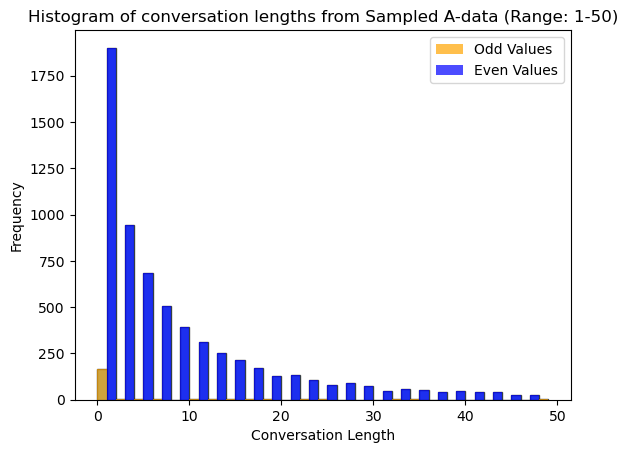

In [74]:
# Get median conversation lengths (e.g. 5/6) and % of conversations that are in that range 
# Trimming conversation lengths >50 in histogram below (as there are very few)

conv_length = data_a_sampled.groupby('id')['conv_length'].first().tolist() # unique value for each conversation 

data = np.array(conv_length)

stats = {
    "mean": np.mean(data),
    "median": np.median(data),
    "standard deviation": np.std(data),
    "variance": np.var(data),
    "minimum": np.min(data),
    "maximum": np.max(data),
    "sum": np.sum(data)
}
print(stats)

bins = np.arange(0.5, 50.5, 1)

# Pre-calculate histogram data for odd and even values
hist_all, _ = np.histogram(data, bins=bins)
hist_odd, _ = np.histogram(data[data % 2 == 1], bins=bins)
hist_even, _ = np.histogram(data[data % 2 == 0], bins=bins)

# Plotting
plt.bar(bins[:-1], hist_all, width=1, edgecolor='black', alpha=0.7)
plt.bar(bins[:-1], hist_odd, width=1, color='orange', alpha=0.7, label='Odd Values')
plt.bar(bins[:-1], hist_even, width=1, color='blue', alpha=0.7, label='Even Values', bottom=hist_odd)

# Customize labels and title
plt.xlabel('Conversation Length')
plt.ylabel('Frequency')
plt.title('Histogram of conversation lengths from Sampled A-data (Range: 1-50)')
plt.legend()

Above plot shows that our sample (data_a_sampled) is representative of the original A-data

Mean: 0.5778571428571428
Standard Deviation: 0.49390106833871344
Standard Error of the Mean (SEM): 0.005903246870592517


Text(0.5, 1.0, 'Distribution of Desired (1) and Undesired (0) \n high-confidence conversations in sampled A-data')

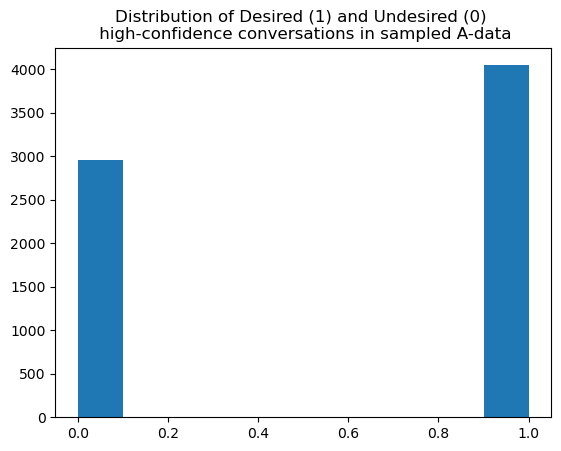

In [76]:
# Plotting the numnber of conversations with desired (result =1) and undesired (result = 0) sentiments

result_array = data_a_sampled.groupby('id')['result'].first().tolist()

# Calculate mean
mean_value = np.mean(result_array)

# Calculate standard deviation
std_deviation = np.std(result_array)

# Calculate standard error of the mean (SEM)
sem_value = np.std(result_array) / np.sqrt(len(result_array))


print("Mean:", mean_value)
print("Standard Deviation:", std_deviation)
print("Standard Error of the Mean (SEM):", sem_value)

plt.hist(result_array);

plt.title('Distribution of Desired (1) and Undesired (0) \n high-confidence conversations in sampled A-data') 

## Performing same analysis on the B-data

In [78]:
# loading first half of B-data

df90k1 = pd.read_csv('/Users/yashakaushal/Documents/Projects/ab_testing/data_exploded_language_92k1.csv', index_col=False)
df90k1 = df90k1.drop(columns=['value','text','markdown'])
df90k1.dropna(inplace=True)

# after manual inspection, removing the system generated artifacts, dropping nan values and adding the language maps

from_map = {'chatgpt':'gpt','user':'human','assistant':'gpt'}
df90k1['from'] = df90k1['from'].replace(from_map)
df90k1 = df90k1[(df90k1['from']=='gpt') | (df90k1['from']=='human')]
df90k1['language'] = df90k1['language'].replace(language_map)
df90k1.drop(columns=['text_from_markdown'],inplace=True)

df90k1

,id,from,extracted_text,language
0,Og9h3C1,human,root@openvpn:/home/openvpn# ./openvpn-install....,English
1,Og9h3C1,gpt,Op basis van de gegevens in de prompt log kan ...,Dutch
2,Og9h3C1,human,sorry kan je een gebruikershandleiding maken?,Afrikaans
3,Og9h3C1,gpt,Open een terminal op de OpenVPN server en navi...,Dutch
4,Og9h3C1,human,kan je uitleg geven waarom je als je passwordl...,English
...,...,...,...,...
1047741,p5mMBtV,gpt,"""I am a giant cat and I crave the taste of hum...",English
1047742,p5mMBtV,human,"""I-I am a human""",Indonesian
1047743,p5mMBtV,gpt,"""Ah, a delicious looking human. I can smell yo...",English
1047744,p5mMBtV,human,"""Have mercy""",English


In [80]:
# similarly processing other half of the B data 

df90k2 = pd.read_csv('/Users/yashakaushal/Documents/Projects/ab_testing/data_exploded_language_92k2.csv', index_col=False)
df90k2 = df90k2.dropna()

from_map = {'chatgpt':'gpt','user':'human','assistant':'gpt'}
df90k2['from'] = df90k2['from'].replace(from_map)
df90k2 = df90k2[(df90k2['from']=='gpt') | (df90k2['from']=='human')]
df90k2['language'] = df90k2['language'].replace(language_map)
df90k2.drop(columns=['text_from_markdown'],inplace=True)

df90k2

,id,from,extracted_text,language
0,RzBNjvK,human,Answer as if you were the medical director of ...,English
1,RzBNjvK,gpt,Preoperative Testing AlgorithmPatient's Medica...,English
2,RzBNjvK,human,Can you add more detail to the types of diagno...,English
3,RzBNjvK,gpt,Sure! Here are some additional details on the ...,English
4,RzBNjvK,human,Add more detail into the types of surgeries,English
...,...,...,...,...
729031,clFMzGf,gpt,"Sure, here is an updated architecture for a so...",English
729032,clFMzGf,human,why you chose Amazon EventBridge ?,English
729033,clFMzGf,gpt,I chose Amazon EventBridge as the messaging sy...,English
729034,Da9D8J4,human,Why are anti viral drugs only used for life th...,English


In [81]:
# Filtering out ids from A set to get dataset from Apr'23 - Jun'23 i.e. B-set

exclude_ids = data_exploded.id.unique()
df90k = df90k1[~df90k1['id'].isin(exclude_ids)]
df90k = df90k2[~df90k2['id'].isin(exclude_ids)]

df90k

,id,from,extracted_text,language
10,Hhq5zTB,human,"Web search results:\n\n[1] ""The deposition eff...",English
11,Hhq5zTB,gpt,Metallic glasses (MGs) are an interesting clas...,English
18,GZ9llsx,human,1 / 1- Prompts # 1\n \n You are a behavi...,English
19,GZ9llsx,gpt,As a behavioral scientist familiar with Susan ...,English
20,GZ9llsx,human,1 / 1That list is not of contextual nudges but...,English
...,...,...,...,...
728965,Gly8XhH,gpt,It sounds like you are in a difficult situatio...,English
728966,Gly8XhH,human,what if i cant have proper conversation with m...,English
728967,Gly8XhH,gpt,I understand that having a conversation with y...,English
729034,Da9D8J4,human,Why are anti viral drugs only used for life th...,English


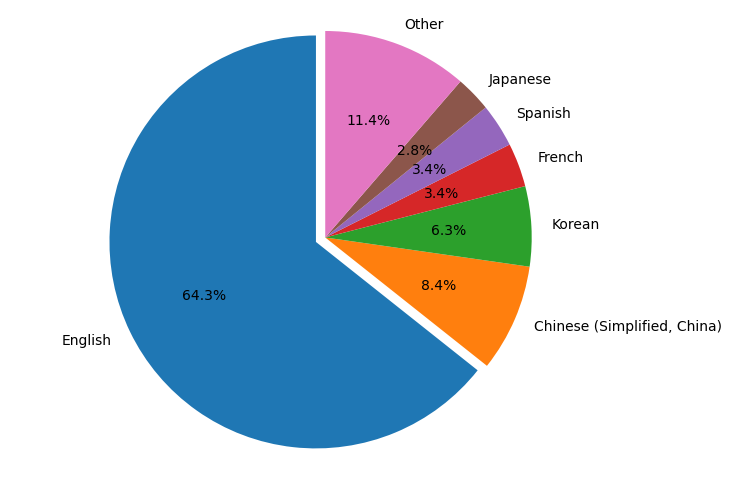

In [82]:
# Creating a pie chart of language distribution in the B-data

language_counts = df90k['language'].value_counts()

# Define the threshold for minor languages, e.g., languages that occur less than 2% of the total
threshold = 0.02 * len(df90k)

# Separate major and minor languages
major_languages = language_counts[language_counts > threshold]
minor_languages = language_counts[language_counts <= threshold]

# Sum the counts of minor languages and create 'Other' category
other_count = minor_languages.sum()

# Combine major languages with 'Other'
language_counts_adjusted = major_languages.append(pd.Series(other_count, index=['Other']))

explode = [0.05 if language == 'English' else 0 for language in language_counts_adjusted.index]

# Now plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(language_counts_adjusted, labels=language_counts_adjusted.index, autopct='%1.1f%%', startangle=90,explode=explode)
# plt.title('Language Distribution with Minor Languages Grouped as Other')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [84]:
df90k['conv_length'] = df90k.groupby('id')['id'].transform('count')
conv_length = df90k.groupby('id')['conv_length'].first().tolist() # unique value for each conversation 
df90k

,id,from,extracted_text,language,conv_length
10,Hhq5zTB,human,"Web search results:\n\n[1] ""The deposition eff...",English,2
11,Hhq5zTB,gpt,Metallic glasses (MGs) are an interesting clas...,English,2
18,GZ9llsx,human,1 / 1- Prompts # 1\n \n You are a behavi...,English,10
19,GZ9llsx,gpt,As a behavioral scientist familiar with Susan ...,English,10
20,GZ9llsx,human,1 / 1That list is not of contextual nudges but...,English,10
...,...,...,...,...,...
728965,Gly8XhH,gpt,It sounds like you are in a difficult situatio...,English,6
728966,Gly8XhH,human,what if i cant have proper conversation with m...,English,6
728967,Gly8XhH,gpt,I understand that having a conversation with y...,English,6
729034,Da9D8J4,human,Why are anti viral drugs only used for life th...,English,2


In [85]:
# Checking distribution of conversation legths for B-data

data = np.array(conv_length)

stats = {
    "mean": np.mean(data),
    "median": np.median(data),
    "standard deviation": np.std(data),
    "variance": np.var(data),
    "minimum": np.min(data),
    "maximum": np.max(data),
    "sum": np.sum(data)
}
print(stats)

{'mean': 16.367837724801337, 'median': 6.0, 'standard deviation': 41.3235263459166, 'variance': 1707.6338296616634, 'minimum': 1, 'maximum': 972, 'sum': 313084}


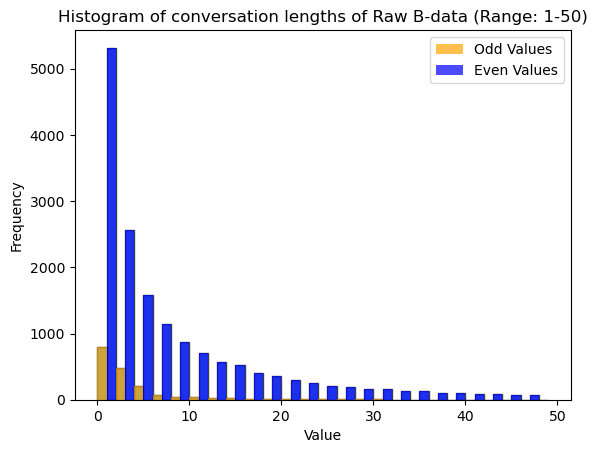

In [87]:
# Checking distribution of conversation lengths in the B-data 

data = np.array(conv_length)

bins = np.arange(0.5, 50.5, 1)

# Pre-calculate histogram data for odd and even values
hist_all, _ = np.histogram(data, bins=bins)
hist_odd, _ = np.histogram(data[data % 2 == 1], bins=bins)
hist_even, _ = np.histogram(data[data % 2 == 0], bins=bins)

# Plotting
plt.bar(bins[:-1], hist_all, width=1, edgecolor='black', alpha=0.7)
plt.bar(bins[:-1], hist_odd, width=1, color='orange', alpha=0.7, label='Odd Values')
plt.bar(bins[:-1], hist_even, width=1, color='blue', alpha=0.7, label='Even Values', bottom=hist_odd)

# Customize labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of conversation lengths of Raw B-data (Range: 1-50)')
plt.legend()

In [94]:
# Performing similar sentiment analysis as done on A set to get sentiment labels (1-5) and their probability scores(0-1)
# Reading the final dataframe directly here - 

data_b = pd.read_csv('/Users/yashakaushal/Documents/Projects/ab_testing/bset/data90_sentiment.csv', index_col=False)
data_b.drop(columns=['text_from_markdown'],inplace=True)
data_b

,id,label,score,from,extracted_text,language,conv_length
0,005Dvz0,4,0.407250,human,1 1我们正在制订国际中文教育微课参赛作品的评价标准。请问我们评价一个国际中文微课标准一般应...,"Chinese (Simplified, China)",20
1,005Dvz0,4,0.407250,gpt,评价国际中文教育微课的标准可以从以下几个方面或维度来考虑：教学内容和设计：评估微课的教学内容...,"Chinese (Simplified, China)",20
2,005Dvz0,4,0.407250,human,1 1这些维度我们觉得对评审专家来说太繁琐了，是否可以合并和转化呢？,"Chinese (Simplified, China)",20
3,005Dvz0,4,0.407250,gpt,是的，您可以根据需要将这些维度合并和转化，以便更好地符合您的评审标准和需要。以下是一些可能的...,"Chinese (Simplified, China)",20
4,005Dvz0,4,0.407250,human,1 1很好！如果我们按百分制来评分，请问对上面三个维度分别赋予什么比例的权重呢？,"Chinese (Simplified, China)",20
...,...,...,...,...,...,...,...
313079,zzh5WAE,1,0.417974,gpt,Sure 's example multiple weight three-stock po...,English,12
313080,zzh5WAE,1,0.417974,human,provide 15 different combination please note s...,English,12
313081,zzh5WAE,1,0.417974,gpt,Sure 15 different weight combination three-sto...,English,12
313082,zzxyHQS,3,0.367422,human,什么是sinh，cosh,Portuguese,2


In [95]:
total_number_of_conversations = len(data_b.groupby('id').groups.keys())
high_confidence_conversations = len(data_b[data_b.score>0.4].groupby('id').groups.keys())

high_confidence_conversations / total_number_of_conversations

0.397741530740276

#### NOTE - 

* Only 39.7 % of total conversations in raw B-data have high confidence in sentiment analysis
* Keeping only those values for further analysis 

In [96]:
data_b = data_b[data_b.score>0.4]
data_b

,id,label,score,from,extracted_text,language,conv_length
0,005Dvz0,4,0.407250,human,1 1我们正在制订国际中文教育微课参赛作品的评价标准。请问我们评价一个国际中文微课标准一般应...,"Chinese (Simplified, China)",20
1,005Dvz0,4,0.407250,gpt,评价国际中文教育微课的标准可以从以下几个方面或维度来考虑：教学内容和设计：评估微课的教学内容...,"Chinese (Simplified, China)",20
2,005Dvz0,4,0.407250,human,1 1这些维度我们觉得对评审专家来说太繁琐了，是否可以合并和转化呢？,"Chinese (Simplified, China)",20
3,005Dvz0,4,0.407250,gpt,是的，您可以根据需要将这些维度合并和转化，以便更好地符合您的评审标准和需要。以下是一些可能的...,"Chinese (Simplified, China)",20
4,005Dvz0,4,0.407250,human,1 1很好！如果我们按百分制来评分，请问对上面三个维度分别赋予什么比例的权重呢？,"Chinese (Simplified, China)",20
...,...,...,...,...,...,...,...
313077,zzh5WAE,1,0.417974,gpt,Sure Here example weight three-asset portfolio...,English,12
313078,zzh5WAE,1,0.417974,human,three stock im asked form portfolio plot mean ...,English,12
313079,zzh5WAE,1,0.417974,gpt,Sure 's example multiple weight three-stock po...,English,12
313080,zzh5WAE,1,0.417974,human,provide 15 different combination please note s...,English,12


In [97]:
high_confidence_positive = len(data_b[data_b.label>=3].groupby('id').groups.keys())
high_confidence_negative = len(data_b[data_b.label<3].groupby('id').groups.keys())

print('Percentage of high confidence positive conversations = %f' %(high_confidence_positive / high_confidence_conversations))
print('Percentage of high confidence negative conversations = %f' %(high_confidence_negative / high_confidence_conversations))
print('Total number of high confidence conversations = %i' %(high_confidence_conversations))

Percentage of high confidence positive conversations = 0.602655
Percentage of high confidence negative conversations = 0.397345
Total number of high confidence conversations = 7608


#### NOTE - 

* About 60.2% of high confidence sentiment conversations were positive leading to customer satisfaction (label >= 3) 
* Adding this information in a new column 'result'
* **IMPORTANT** Look how the total number of high confidence conversations in raw B-data (7608) is **very close** to the minimumm sample size required by power analysis (~7000)

In [100]:
data_b['result'] = data_b['label'].apply(lambda x: 1 if x >= 3 else 0)
data_b

,id,label,score,from,extracted_text,language,conv_length,result
0,005Dvz0,4,0.407250,human,1 1我们正在制订国际中文教育微课参赛作品的评价标准。请问我们评价一个国际中文微课标准一般应...,"Chinese (Simplified, China)",20,1
1,005Dvz0,4,0.407250,gpt,评价国际中文教育微课的标准可以从以下几个方面或维度来考虑：教学内容和设计：评估微课的教学内容...,"Chinese (Simplified, China)",20,1
2,005Dvz0,4,0.407250,human,1 1这些维度我们觉得对评审专家来说太繁琐了，是否可以合并和转化呢？,"Chinese (Simplified, China)",20,1
3,005Dvz0,4,0.407250,gpt,是的，您可以根据需要将这些维度合并和转化，以便更好地符合您的评审标准和需要。以下是一些可能的...,"Chinese (Simplified, China)",20,1
4,005Dvz0,4,0.407250,human,1 1很好！如果我们按百分制来评分，请问对上面三个维度分别赋予什么比例的权重呢？,"Chinese (Simplified, China)",20,1
...,...,...,...,...,...,...,...,...
313077,zzh5WAE,1,0.417974,gpt,Sure Here example weight three-asset portfolio...,English,12,0
313078,zzh5WAE,1,0.417974,human,three stock im asked form portfolio plot mean ...,English,12,0
313079,zzh5WAE,1,0.417974,gpt,Sure 's example multiple weight three-stock po...,English,12,0
313080,zzh5WAE,1,0.417974,human,provide 15 different combination please note s...,English,12,0


In [101]:
power_sample_size = 7000

unique_ids = pd.Series(data_b['id'].unique())
sampled_ids = pd.DataFrame(unique_ids.sample(n=power_sample_size, random_state=11),columns=['id'])
data_b_sampled = data_b.merge(sampled_ids,on='id',how='inner')
data_b_sampled

,id,label,score,from,extracted_text,language,conv_length,result
0,00B9jFM,1,0.483460,human,give python,Danish,4,0
1,00B9jFM,1,0.483460,gpt,Sure simple Python code example get started He...,English,4,0
2,00B9jFM,1,0.483460,human,Give javascript code calculate Fibonacci,Romanian,4,0
3,00B9jFM,1,0.483460,gpt,Certainly Here example JavaScript function cal...,English,4,0
4,017jvPB,1,0.417159,human,Vipul Vyas Reply Complete Hello Vipul Please c...,English,2,0
...,...,...,...,...,...,...,...,...
117760,zyRozT3,4,0.448914,gpt,Lesson Title Exploring Isolation Chapter 5 The...,English,2,1
117761,zzUqFPJ,1,0.599060,human,Why email verification token code insecure adv...,English,4,0
117762,zzUqFPJ,1,0.599060,gpt,The email verification token code insecure usi...,English,4,0
117763,zzUqFPJ,1,0.599060,human,2 2Demonstrate generate valid verification lin...,English,4,0


In [102]:
len(data_b_sampled.id.unique())

7000

{'mean': 16.82357142857143, 'median': 6.0, 'standard deviation': 41.84746640344855, 'variance': 1751.2104443877552, 'minimum': 1, 'maximum': 972, 'sum': 117765}


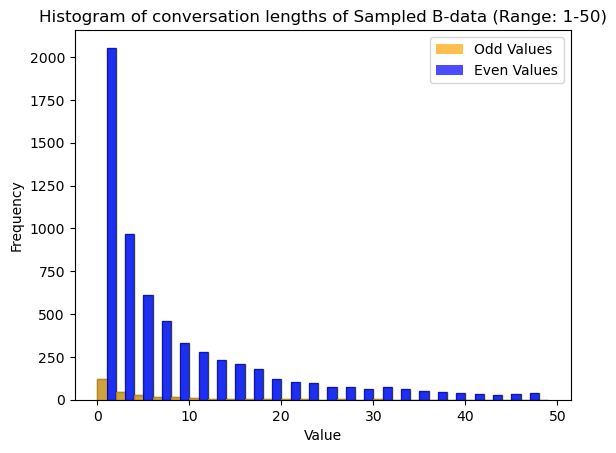

In [103]:
# Get median conversation lengths (e.g. 5/6) and % of the sampled B-data conversations 

conv_length = data_b_sampled.groupby('id')['conv_length'].first().tolist() # unique value for each conversation 

data = np.array(conv_length)

stats = {
    "mean": np.mean(data),
    "median": np.median(data),
    "standard deviation": np.std(data),
    "variance": np.var(data),
    "minimum": np.min(data),
    "maximum": np.max(data),
    "sum": np.sum(data)
}
print(stats)

bins = np.arange(0.5, 50.5, 1)

# Pre-calculate histogram data for odd and even values
hist_all, _ = np.histogram(data, bins=bins)
hist_odd, _ = np.histogram(data[data % 2 == 1], bins=bins)
hist_even, _ = np.histogram(data[data % 2 == 0], bins=bins)

# Plotting
plt.bar(bins[:-1], hist_all, width=1, edgecolor='black', alpha=0.7)
plt.bar(bins[:-1], hist_odd, width=1, color='orange', alpha=0.7, label='Odd Values')
plt.bar(bins[:-1], hist_even, width=1, color='blue', alpha=0.7, label='Even Values', bottom=hist_odd)

# Customize labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of conversation lengths of Sampled B-data (Range: 1-50)')
plt.legend()

Mean: 0.5778571428571428
Standard Deviation: 0.49390106833871344
Standard Error of the Mean (SEM): 0.005903246870592517

Mean: 0.603
Standard Deviation: 0.48927599573246994
Standard Error of the Mean (SEM): 0.005847966679600207


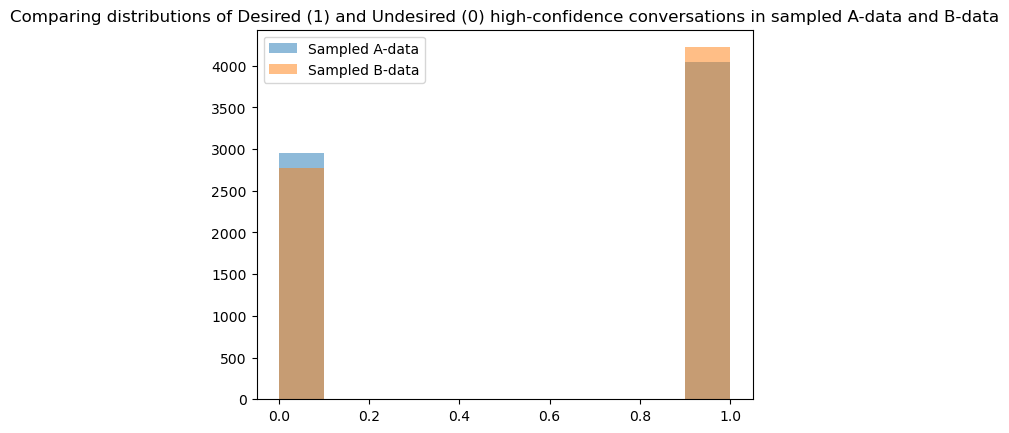

In [107]:
# Comparing distributions of Desired (1) and Undesired (0) high-confidence conversations in sampled A-data and sampled B-data

result_array_a = data_a_sampled.groupby('id')['result'].first().tolist()
result_array_b = data_b_sampled.groupby('id')['result'].first().tolist()

# Calculate mean
mean_value = np.mean(result_array_a)

# Calculate standard deviation
std_deviation = np.std(result_array_a)

# Calculate standard error of the mean (SEM)
sem_value = np.std(result_array_a) / np.sqrt(len(result_array_a))

print("Mean:", mean_value)
print("Standard Deviation:", std_deviation)
print("Standard Error of the Mean (SEM):", sem_value)
print('')

# Calculate mean
mean_value = np.mean(result_array_b)

# Calculate standard deviation
std_deviation = np.std(result_array_b)

# Calculate standard error of the mean (SEM)
sem_value = np.std(result_array_b) / np.sqrt(len(result_array_b))

print("Mean:", mean_value)
print("Standard Deviation:", std_deviation)
print("Standard Error of the Mean (SEM):", sem_value)


plt.hist(result_array_a,alpha=0.5, label= 'Sampled A-data');
plt.hist(result_array_b,alpha=0.5, label = 'Sampled B-data');

plt.title('Comparing distributions of Desired (1) and Undesired (0) high-confidence conversations in sampled A-data and B-data')

plt.legend()

### Hypothesis testing - is the above difference we are observing statistically significant ?

* Since we have a very large sample, we can use the normal approximation for calculating our p-value (i.e. z-test)

In [109]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

control_results = result_array_a
treatment_results = result_array_b

n_con = len(control_results)
n_treat = len(treatment_results)

successes = [sum(control_results), sum(treatment_results)]
nobs = [n_con, n_treat]

z_stat, pval = proportions_ztest(successes, nobs=nobs)
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes, nobs=nobs, alpha=0.05)

print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print(f'CI 95% for control group: [{lower_con:.3f}, {upper_con:.3f}]')
print(f'CI 95% for treatment group: [{lower_treat:.3f}, {upper_treat:.3f}]')

z statistic: -3.02
p-value: 0.002
CI 95% for control group: [0.566, 0.589]
CI 95% for treatment group: [0.592, 0.614]


## Voila!

* Our new design is performing according to our expectations! 
* p (0.002) < alpha (0.05), we can reject the null hypothesis that the two versions of the bot (ChatGPT-3.5 and ChatGPT-4) perform the same 
* Our new bot has increased customer satisfaction (positive sentiment conversation ratio) from 57.8% to 60.3% - roughly by 2.5% !!
* And this 2.5% increment is statistically significant !

![Local Image](result.jpg)

### NOTE - 
* We find no significant difference in the conversation length summary statistics of (+) and (-) user experiences. 
* Length of conversation may be a poor indicator/metric for analyzing **dissatisfaction** in customers

## Identifying pain-points of customer dissatisfaction 
* let's focus on result 0 group 
* Performing LDA to grasp the context of conversation that led to dissatisfaction 

### For Sampled A-data

In [120]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# Taking only conversations that are in English language and have '0' result value (negative sentiment in overall conversation exchange) 

data_a_sampled['lda_text'] = data_a_sampled[(data_a_sampled.language=='English') & (data_a_sampled.result==0)]['extracted_text'].apply(preprocess_text)


In [121]:
data_a_sampled

,id,label,score,from,value,extracted_text,language,conv_length,result,lda_text
0,00bvJVh,1,0.506088,human,What kind of topics are needed to write a AI b...,What kind topic needed write AI book kid,English,20,0,"[kind, topic, needed, write, ai, book, kid]"
1,00bvJVh,1,0.506088,gpt,"<div class=""markdown prose w-full break-words ...",To write AI book kid topic could covered inclu...,English,20,0,"[write, ai, book, kid, topic, could, covered, ..."
2,00bvJVh,1,0.506088,human,What are the most important things to explain ...,What important thing explain AI concept Kids,English,20,0,"[important, thing, explain, ai, concept, kids]"
3,00bvJVh,1,0.506088,gpt,"<div class=""markdown prose w-full break-words ...",When explaining AI concept kid 's important Us...,English,20,0,"[explaining, ai, concept, kid, important, use,..."
4,00bvJVh,1,0.506088,human,What are the best examples or books related to...,What best example book related explain AI kid,English,20,0,"[best, example, book, related, explain, ai, kid]"
...,...,...,...,...,...,...,...,...,...,...
104083,zzs8XiG,3,0.514045,gpt,<div><p>Certainly! Here are 25 noun suffixes w...,Certainly Here 25 noun suffix meaning -age col...,English,10,1,NaN
104084,zzs8XiG,3,0.514045,human,provide 25 adverbial suffix with meaning for m...,provide 25 adverbial suffix meaning English as...,English,10,1,NaN
104085,zzs8XiG,3,0.514045,gpt,<div><p>Certainly! Here are 25 adverbial suffi...,Certainly Here 25 adverbial suffix meaning -wa...,English,10,1,NaN
104086,zzs8XiG,3,0.514045,human,provide 25 adjective suffix with meaning for m...,provide 25 adjective suffix meaning English as...,English,10,1,NaN


In [122]:
# Storing that information in a new dataframe and dropping nan rows
data_a_sampled_negative = data_a_sampled.dropna()
data_a_sampled_negative

,id,label,score,from,value,extracted_text,language,conv_length,result,lda_text
0,00bvJVh,1,0.506088,human,What kind of topics are needed to write a AI b...,What kind topic needed write AI book kid,English,20,0,"[kind, topic, needed, write, ai, book, kid]"
1,00bvJVh,1,0.506088,gpt,"<div class=""markdown prose w-full break-words ...",To write AI book kid topic could covered inclu...,English,20,0,"[write, ai, book, kid, topic, could, covered, ..."
2,00bvJVh,1,0.506088,human,What are the most important things to explain ...,What important thing explain AI concept Kids,English,20,0,"[important, thing, explain, ai, concept, kids]"
3,00bvJVh,1,0.506088,gpt,"<div class=""markdown prose w-full break-words ...",When explaining AI concept kid 's important Us...,English,20,0,"[explaining, ai, concept, kid, important, use,..."
4,00bvJVh,1,0.506088,human,What are the best examples or books related to...,What best example book related explain AI kid,English,20,0,"[best, example, book, related, explain, ai, kid]"
...,...,...,...,...,...,...,...,...,...,...
104003,zsWBpY3,1,0.571446,gpt,"<div class=""markdown prose w-full break-words ...",Thesis The Economics Production Methamphetamin...,English,2,0,"[thesis, economics, production, methamphetamin..."
104004,zsXLhp3,1,0.413582,human,Continue worldbuilding the following setting:,Continue worldbuilding following setting,English,4,0,"[continue, worldbuilding, following, setting]"
104005,zsXLhp3,1,0.413582,gpt,"<div class=""markdown prose w-full break-words ...",Certainly Please provide prompt setting would ...,English,4,0,"[certainly, please, provide, prompt, setting, ..."
104006,zsXLhp3,1,0.413582,human,A existentialist hard sci fi horror Tabletop t...,A existentialist hard sci fi horror Tabletop t...,English,4,0,"[existentialist, hard, sci, fi, horror, tablet..."


In [123]:
from gensim import corpora, models

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(data_a_sampled_negative['lda_text'])

# Filter out extremes to remove infrequent and too frequent words
dictionary.filter_extremes(no_below=5, no_above=0.5)

# Convert dictionary to a bag of words corpus
corpus = [dictionary.doc2bow(text) for text in data_a_sampled_negative['lda_text'].agg(list)]


In [124]:
# Number of topics
num_topics = 5

# Build LDA model
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# Print the topics
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))


Topic: 0 
Words: 0.033*"1" + 0.022*"2" + 0.016*"3" + 0.015*"pontoon" + 0.015*"number" + 0.012*"4" + 0.011*"c" + 0.010*"x" + 0.009*"10" + 0.008*"5"
Topic: 1 
Words: 0.015*"file" + 0.012*"code" + 0.011*"use" + 0.010*"using" + 0.009*"user" + 0.009*"new" + 0.008*"function" + 0.008*"name" + 0.008*"data" + 0.008*"example"
Topic: 2 
Words: 0.010*"nt" + 0.010*"│" + 0.006*"like" + 0.006*"’" + 0.005*"one" + 0.005*"would" + 0.005*"go" + 0.005*"could" + 0.005*"”" + 0.005*"“"
Topic: 3 
Words: 0.022*"0" + 0.017*"function" + 0.014*"return" + 0.012*"const" + 0.012*"value" + 0.012*"code" + 0.012*"string" + 0.011*"input" + 0.010*"1" + 0.008*"example"
Topic: 4 
Words: 0.007*"may" + 0.007*"information" + 0.006*"also" + 0.005*"provide" + 0.005*"use" + 0.004*"system" + 0.004*"ai" + 0.004*"important" + 0.004*"need" + 0.004*"language"


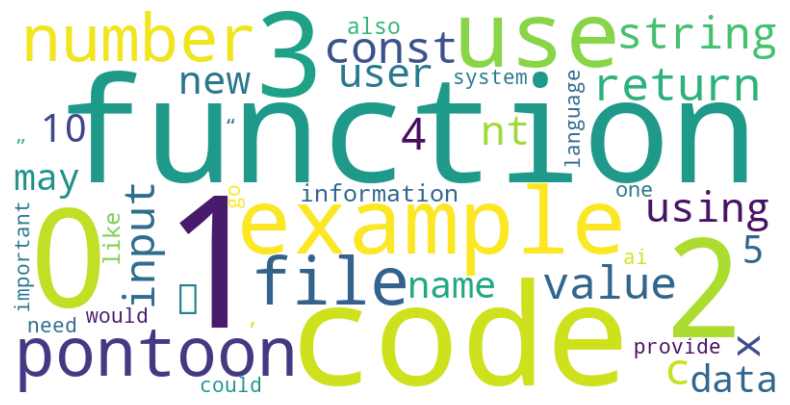

In [125]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

top_words_per_topic = []

for t in range(num_topics):
    top_words_per_topic.extend([(t,) + x for x in lda_model.show_topic(t, topn=10)])

df = pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P'])

# Generate word frequencies
word_freq = df.groupby('Word').sum()['P'].to_dict()

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the generated Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

NOTE - 

* Looks like majority of the topics that lead to dissatisfaction / poor sentiment label were related to programming, packages, data and modeling. 
* This wordcloud gives valuable insights to the pain-points of customer interaction with our bot and we could improvise on those areas with better fine-tuning and training 


### For Sampled B-data

In [128]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# Taking only conversations that are in English language and have '0' result value (negative sentiment in overall conversation exchange) 

data_b_sampled.dropna(inplace=True)
data_b_sampled['lda_text'] = data_b_sampled[(data_b_sampled.language=='English') & (data_b_sampled.result==0)]['extracted_text'].apply(preprocess_text)


In [129]:
data_b_sampled

,id,label,score,from,extracted_text,language,conv_length,result,lda_text
0,00B9jFM,1,0.483460,human,give python,Danish,4,0,NaN
1,00B9jFM,1,0.483460,gpt,Sure simple Python code example get started He...,English,4,0,"[sure, simple, python, code, example, get, sta..."
2,00B9jFM,1,0.483460,human,Give javascript code calculate Fibonacci,Romanian,4,0,NaN
3,00B9jFM,1,0.483460,gpt,Certainly Here example JavaScript function cal...,English,4,0,"[certainly, example, javascript, function, cal..."
4,017jvPB,1,0.417159,human,Vipul Vyas Reply Complete Hello Vipul Please c...,English,2,0,"[vipul, vyas, reply, complete, hello, vipul, p..."
...,...,...,...,...,...,...,...,...,...
117760,zyRozT3,4,0.448914,gpt,Lesson Title Exploring Isolation Chapter 5 The...,English,2,1,NaN
117761,zzUqFPJ,1,0.599060,human,Why email verification token code insecure adv...,English,4,0,"[email, verification, token, code, insecure, a..."
117762,zzUqFPJ,1,0.599060,gpt,The email verification token code insecure usi...,English,4,0,"[email, verification, token, code, insecure, u..."
117763,zzUqFPJ,1,0.599060,human,2 2Demonstrate generate valid verification lin...,English,4,0,"[2, 2demonstrate, generate, valid, verificatio..."


In [130]:
# Storing that information in a new dataframe and dropping nan rows

data_b_sampled_negative = data_b_sampled.dropna()
data_b_sampled_negative

,id,label,score,from,extracted_text,language,conv_length,result,lda_text
1,00B9jFM,1,0.483460,gpt,Sure simple Python code example get started He...,English,4,0,"[sure, simple, python, code, example, get, sta..."
3,00B9jFM,1,0.483460,gpt,Certainly Here example JavaScript function cal...,English,4,0,"[certainly, example, javascript, function, cal..."
4,017jvPB,1,0.417159,human,Vipul Vyas Reply Complete Hello Vipul Please c...,English,2,0,"[vipul, vyas, reply, complete, hello, vipul, p..."
5,017jvPB,1,0.417159,gpt,Hello Vipul Thank reaching Unfortunately I acc...,English,2,0,"[hello, vipul, thank, reaching, unfortunately,..."
6,01gVJ2y,2,0.455121,human,Tell paging query offset I using spring boot s...,English,6,0,"[tell, paging, query, offset, using, spring, b..."
...,...,...,...,...,...,...,...,...,...
117728,zwfSWfk,1,0.476607,gpt,Answer Since 7 egg must eat least 2 per day le...,English,4,0,"[answer, since, 7, egg, must, eat, least, 2, p..."
117761,zzUqFPJ,1,0.599060,human,Why email verification token code insecure adv...,English,4,0,"[email, verification, token, code, insecure, a..."
117762,zzUqFPJ,1,0.599060,gpt,The email verification token code insecure usi...,English,4,0,"[email, verification, token, code, insecure, u..."
117763,zzUqFPJ,1,0.599060,human,2 2Demonstrate generate valid verification lin...,English,4,0,"[2, 2demonstrate, generate, valid, verificatio..."


In [131]:
from gensim import corpora, models

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(data_b_sampled_negative['lda_text'])

# Filter out extremes to remove infrequent and too frequent words
dictionary.filter_extremes(no_below=5, no_above=0.5)

# Convert dictionary to a bag of words corpus
corpus = [dictionary.doc2bow(text) for text in data_b_sampled_negative['lda_text'].agg(list)]


In [132]:
# Number of topics
num_topics = 5

# Build LDA model
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# Print the topics
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))


Topic: 0 
Words: 0.034*"1" + 0.021*"0" + 0.015*"2" + 0.011*"return" + 0.011*"c" + 0.010*"number" + 0.009*"3" + 0.009*"x" + 0.009*"function" + 0.008*"value"
Topic: 1 
Words: 0.007*"’" + 0.006*"nt" + 0.005*"like" + 0.005*"one" + 0.004*"would" + 0.004*"make" + 0.004*"time" + 0.004*"also" + 0.004*"could" + 0.004*"know"
Topic: 2 
Words: 0.028*"import" + 0.024*"print" + 0.021*"text" + 0.018*"classifier" + 0.016*"label" + 0.014*"data" + 0.014*"traindf" + 0.011*"token" + 0.010*"xtrain" + 0.009*"training"
Topic: 3 
Words: 0.009*"data" + 0.008*"use" + 0.008*"information" + 0.007*"system" + 0.007*"product" + 0.006*"used" + 0.005*"model" + 0.005*"may" + 0.005*"using" + 0.005*"provide"
Topic: 4 
Words: 0.014*"code" + 0.014*"file" + 0.012*"const" + 0.012*"function" + 0.011*"return" + 0.011*"name" + 0.010*"new" + 0.010*"user" + 0.008*"error" + 0.008*"string"


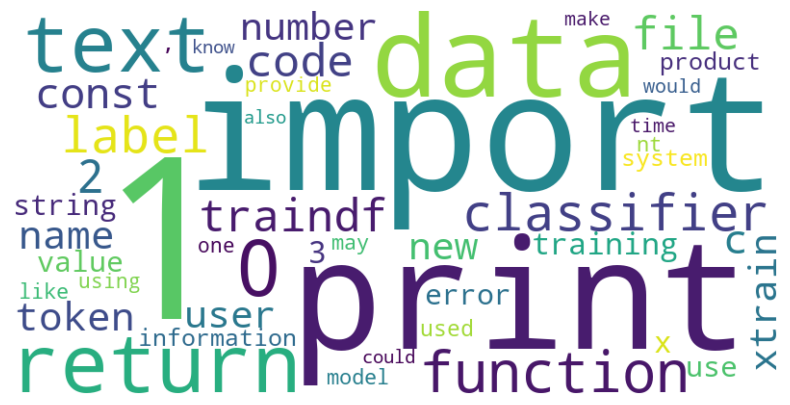

In [133]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

top_words_per_topic = []

for t in range(num_topics):
    top_words_per_topic.extend([(t,) + x for x in lda_model.show_topic(t, topn=10)])

df = pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P'])

# Generate word frequencies
word_freq = df.groupby('Word').sum()['P'].to_dict()

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the generated Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

This is similar to A-data